# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Bernardinus Rico Dewanto
- **Email:** dewantobernardinus@gmail.com
- **ID Dicoding:** bernardinus_rico

# Overview

E-commerce adalah proses membeli dan menjual barang atau jasa melalui internet. Ini mencakup berbagai aktivitas yang terjadi secara online, termasuk:
1. B2C (Business-to-Consumer):
Model ini melibatkan transaksi antara perusahaan dan konsumen. Contoh yang paling umum adalah toko online seperti Amazon, eBay, atau Tokopedia.
2. B2B (Business-to-Business):
Dalam model ini, transaksi dilakukan antara dua bisnis. Misalnya, perusahaan yang menjual produk atau jasa kepada perusahaan lain, seperti pemasok bahan baku.
3. C2C (Consumer-to-Consumer):
Model ini melibatkan transaksi antara konsumen, sering kali melalui platform yang memfasilitasi perdagangan, seperti OLX atau marketplace lainnya.
4. C2B (Consumer-to-Business):
Dalam model ini, konsumen menawarkan produk atau jasa kepada perusahaan. Contoh termasuk freelancer yang menawarkan layanan mereka di platform seperti Upwork.

Fitur E-commerce :
- Website atau Platform Online.
- Pembayaran Digital
- Logistik dan Pengiriman.
- Layanan Pelanggan melalui chat, email, atau telepon.

Manfaat E-commerce
- Akses Global.
- Pembeli dapat berbelanja kapan saja dan di mana saja tanpa harus mengunjungi toko fisik.
- Beragam Pilihan.

### Permasalahan
Pada dataset e-commerce ini, dataset memiliki beberapa bagian yang terdiri dari data customers, geolocation, order_items, order_payments, order_review, orders, product_category, products, users.

Dalam konsistensi perusahaan untuk memberikan pelayanan yang terbaik kepada user/pelanggan, **perusahaan akan terus berinovasi dengan meningkatkan pelayanan** pada website dan memperkenalkan fitur-fitur baru yang memudahkan navigasi serta interaksi. Selain itu, perusahaan juga akan fokus pada personalisasi pengalaman pengguna dengan memberikan rekomendasi produk yang relevan berdasarkan riwayat pembelian dan preferensi mereka.  Dengan demikian, masyarakat pengguna E-commerce akan lebih nyaman dalam bertransaksi.

Untuk menjawab permasalahan tersebut saya akan memberikan referensi sebagai berikut :
1. Produk apa yang paling banyak dan sedikit terjual?
2. Wilayah yang paling sering melakukan transaksi
3. Bagaimana tingkatan review yang diberikan oleh pelanggan ke suatu produk?

### stakeholder
E-Commerce yang terletak di Brazil

# Import Library

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats

# Data Wrangling

### Gathering Data

In [100]:
customers = pd.read_csv(r"C:\Users\Anonymus\Documents\E-commerce\data\customers.csv")
geolocation = pd.read_csv(r"C:\Users\Anonymus\Documents\E-commerce\data\geolocation.csv")
items = pd.read_csv(r"C:\Users\Anonymus\Documents\E-commerce\data\order_items.csv")
payments = pd.read_csv(r"C:\Users\Anonymus\Documents\E-commerce\data\order_payments.csv")
reviews = pd.read_csv(r"C:\Users\Anonymus\Documents\E-commerce\data\order_reviews.csv")
orders = pd.read_csv(r"C:\Users\Anonymus\Documents\E-commerce\data\orders.csv", encoding='utf-8')
category = pd.read_csv(r"C:\Users\Anonymus\Documents\E-commerce\data\product_category_name_translation.csv", encoding='utf-8')
products = pd.read_csv(r"C:\Users\Anonymus\Documents\E-commerce\data\products.csv", encoding='utf-8')
sellers = pd.read_csv(r"C:\Users\Anonymus\Documents\E-commerce\data\sellers.csv", encoding='utf-8')

In [3]:
data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}
print('Preview orders')
data['orders'].head()

Preview orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
print('Preview items')
data['items'].head()

Preview items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
print('Preview products \n')
data['products'].head()

Preview products 



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
print('Preview reviews')
data['reviews'].head()

Preview reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
print('Preview sellers')
data['sellers'].head()

Preview sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
print('Preview customers')
data['customers'].head()

Preview customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
print('Preview geolocation \n')
data['geo'].head()

Preview geolocation 



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
print('Preview category \n')
data['category'].head()

Preview category 



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
print('Preview payments \n')
data['payments'].head()

Preview payments 



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assesing Data

#### Cek data types

In [12]:
data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

for df_name, df in data.items():
    print(df_name, '\n', df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
orders 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 n

#### cek missing value

In [13]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

for name, df in data.items():
    # Memeriksa kolom yang memiliki nilai hilang dan jumlahnya
    missing_values = df.isnull().sum()

    # Memfilter hanya kolom yang memiliki nilai hilang
    missing_columns = missing_values[missing_values > 0]

    if not missing_columns.empty:
        # Mencetak nama Dataset dan kolom dengan jumlah nilai hilang
        print(f"Dataset '{name}' memiliki missing value pada kolom:")
        print(missing_columns)
        print("-" * 50)

Dataset 'orders' memiliki missing value pada kolom:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64
--------------------------------------------------
Dataset 'products' memiliki missing value pada kolom:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
--------------------------------------------------
Dataset 'reviews' memiliki missing value pada kolom:
review_comment_title      87656
review_comment_message    58247
dtype: int64
--------------------------------------------------


In [14]:
# cek missing value (cara 2)
print('customers \n', customers.isnull().sum())
print('\n geolocation \n', geolocation.isnull().sum())
print('\n items \n', items.isnull().sum())
print('\n payments \n', payments.isnull().sum())
print('\n reviews \n', reviews.isnull().sum())
print('\n orders \n', orders.isnull().sum())
print('\n category \n', category.isnull().sum())
print('\n products \n', products.isnull().sum())
print('\n sellers \n', sellers.isnull().sum())

customers 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 geolocation 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 reviews 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

 orders 
 order_id  

#### cek data duplicate

In [15]:
print('customers \n', customers.duplicated().sum())
print('\n geolocation \n', geolocation.duplicated().sum())
print('\n items \n', items.duplicated().sum())
print('\n payments \n', payments.duplicated().sum())
print('\n reviews \n', reviews.duplicated().sum())
print('\n orders \n', orders.duplicated().sum())
print('\n category \n', category.duplicated().sum())
print('\n products \n', products.duplicated().sum())
print('\n sellers \n', sellers.duplicated().sum())

customers 
 0

 geolocation 
 261831

 items 
 0

 payments 
 0

 reviews 
 0

 orders 
 0

 category 
 0

 products 
 0

 sellers 
 0


### Data Cleaning

#### handle data duplicate

In [16]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
data['geo'].value_counts().duplicated()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  geolocation_city  geolocation_state
88220                        -27.102099       -48.629613       itapema           SC                   False
6414                         -23.495901       -46.874687       barueri           SP                   False
                             -23.490618       -46.869004       barueri           SP                   False
5145                         -23.506049       -46.717377       sao paulo         SP                   False
22620                        -23.005514       -43.375964       rio de janeiro    RJ                   False
                                                                                                      ...  
99980                        -28.389732       -51.850755       david canabarro   RS                    True
                             -28.389520       -51.840998       david canabarro   RS                    True
                             -28.3892

In [18]:
# remove duplicate data
data['geo'].drop_duplicates(inplace=True)

In [19]:
data['geo'].duplicated().sum()

np.int64(0)

### handle missing value

Missing value terdapat pada dataset 'reviews', 'products', dan 'orders'

#### 'orders'

In [20]:
# Memilih orders yang hanya delivered
print(data['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [21]:
# Hitung jumlah pesanan yang berstatus 'delivered'
delivered_orders = data['orders'].order_status.value_counts()['delivered']

# Hitung persentase pesanan yang 'delivered'
delivered_percentage = round((delivered_orders / len(data['orders'])) * 100, 2)

# Tampilkan hasil dengan f-string
print(f'Taking only delivered orders we still get {delivered_percentage}% of data.')

Taking only delivered orders we still get 97.02% of data.


In [22]:
# Pertama, ambil semua 'order_id' di mana status pesanan tidak 'delivered'
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

# filter setiap dataframe lain di mana 'order_id' adalah foreign
for key, dataframe in data.items():
    # Periksa apakah kolom 'order_id' ada di dataframe tersebut
    if 'order_id' in dataframe.columns:
        # Hapus baris yang 'order_id'-nya ada di daftar 'delivered'
        rows_to_drop = dataframe['order_id'].isin(delivered)
        dataframe.drop(dataframe[rows_to_drop].index, inplace=True)

In [23]:
# Memeriksa nilai NaN di setiap dataset
for dataset_name, dataset in data.items():
    for column in dataset.columns:
        # Jika kolom memiliki nilai NaN, cetak nama kolom dan persentase NaN
        nan_count = dataset[column].isnull().sum()
        if nan_count > 0:
            nan_percentage = (nan_count / len(dataset)) * 100
            print(f'{column} (%): {nan_percentage:.2f}')

order_approved_at (%): 0.01
order_delivered_carrier_date (%): 0.00
order_delivered_customer_date (%): 0.01
product_category_name (%): 1.85
product_name_lenght (%): 1.85
product_description_lenght (%): 1.85
product_photos_qty (%): 1.85
product_weight_g (%): 0.01
product_length_cm (%): 0.01
product_height_cm (%): 0.01
product_width_cm (%): 0.01
review_comment_title (%): 88.37
review_comment_message (%): 59.42


In [24]:
# Tangani NaN di data orders
# Perhatikan bahwa NaN dalam daftar orders tidak terlalu banyak (setelah diambil hanya yang delivered sebelumnya)
# yang penting adalah 'order_delivered_customer_date'.
missing_delivery_dates = data['orders'].order_delivered_customer_date.isnull().sum()

# Tampilkan jumlah pesanan yang tidak memiliki tanggal pengiriman
print(f'There are only {missing_delivery_dates} orders that are missing delivery dates.')

There are only 8 orders that are missing delivery dates.


In [25]:
# Kita bisa menghapusnya dengan cara yang sama seperti sebelumnya
# Pertama, ambil semua 'order_id' yang tidak memiliki 'order_delivered_customer_date'
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

# Sekarang filter setiap dataframe lain di mana 'order_id' adalah kunci asing
for dataset_name, dataframe in data.items():
    # Periksa apakah kolom 'order_id' ada di dataframe tersebut
    if 'order_id' in dataframe.columns:
        # Hapus baris di mana 'order_id'-nya ada dalam daftar 'null_deliveries'
        rows_to_drop = dataframe['order_id'].isin(null_deliveries)
        dataframe.drop(dataframe[rows_to_drop].index, inplace=True)

In [26]:
# Saya lebih tertarik pada apakah pesanan dikirim tepat waktu daripada tanggal pengirimannya
data['orders']['delivered_on_time'] = np.where(
    data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'],
    'On Time',
    'Late')

In [27]:
#fillna
data['orders']['order_approved_at'].fillna(value='0', inplace=True)

C:\Users\Anonymus\AppData\Local\Temp\ipykernel_18732\2505909173.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['orders']['order_approved_at'].fillna(value='0', inplace=True)


#### 'reviews'

In [28]:
# Tampilkan nama kolom di dataframe reviews
print('Review columns:', data['reviews'].columns.values)

# Kolom review_comment_title memiliki 88% nilai NaN, jadi saya akan menghapusnya.
# Nilai NaN untuk data review berarti data tersebut memang tidak ada.

# Kolom yang akan dihapus
review_drop_cols = ['review_comment_title']
data['reviews'].drop(columns=review_drop_cols, inplace=True)

Review columns: ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [29]:
data['reviews'].isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_message     57259
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [30]:
# Mungkin jika kita sedang membahas sentiment classifier kita akan fokus ke data ini.
# Namun, disini saya tidak terlalu tertarik dengan comment.
# dari yang saya liat, Review_comment_mesaage NaN kalau seseorang tidak komentar.
# saya tidak ingin menghapusnya, jadi saya isi review_comment_message yang Nan dengan 0, dan yang leave komentar dengan 1
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)

#### 'products'

In [31]:
print('Product cols: ' , data['products'].columns.values)

Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [32]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm   

In [33]:
# saya tidak bisa memikirkan yang harus dilakukan terhadap kolom missing di produc
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(product_drop_cols, axis= 1, inplace= True)

In [34]:
#fillna dilakukan.
# setelah melihat di dataset 'products' yang cukup banyak rownya, saya pikir aman untukk fillna
# products_category_name dengan outro dan
# product_photos_qty dengan 0. product_photos_qty tidak mungkin bernilai 0
data['products']['product_category_name'].fillna(value='outro', inplace=True)
data['products']['product_photos_qty'].fillna(value=0, inplace=True)

C:\Users\Anonymus\AppData\Local\Temp\ipykernel_18732\2223570612.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['products']['product_category_name'].fillna(value='outro', inplace=True)
C:\Users\Anonymus\AppData\Local\Temp\ipykernel_18732\2223570612.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [35]:
print('\n reviews \n', reviews.isnull().sum())
print('\n orders \n', orders.isnull().sum())
print('\n products \n', products.isnull().sum())


 reviews 
 review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

 orders 
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     1
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivered_on_time                0
dtype: int64

 products 
 product_id               0
product_category_name    0
product_photos_qty       0
dtype: int64


# Exploratory Data Analysis (EDA)

In [36]:
# Memeriksa apakah setiap DataFrame memiliki kolom 'order_id'
for name, df in data.items():
    if 'order_id' in df.columns:
        print(f"{name} memiliki kolom 'order_id'")
    else:
        print("")

orders memiliki kolom 'order_id'
items memiliki kolom 'order_id'

payments memiliki kolom 'order_id'
reviews memiliki kolom 'order_id'






In [37]:
# Memeriksa apakah setiap DataFrame memiliki kolom 'seller_id'
for name, df in data.items():
    if 'seller_id' in df.columns:
        print(f"{name} memiliki kolom 'seller_id'")
    else:
        print("")


items memiliki kolom 'seller_id'




sellers memiliki kolom 'seller_id'




### Explore customer

In [38]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

customer_id (jumlah akun) paling banyak terletak di Sao Paolo dengan jumlah 15540

In [39]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [40]:
#menghitung berapa banyak jumlah city di dalam suatu state

state_city_counts = data['customers'].groupby('customer_state')['customer_city'].nunique().reset_index(name='City Count')
# Menampilkan hasil
print(state_city_counts)

   customer_state  City Count
0              AC           8
1              AL          68
2              AM           5
3              AP           6
4              BA         353
5              CE         161
6              DF           6
7              ES          95
8              GO         178
9              MA         122
10             MG         745
11             MS          67
12             MT         101
13             PA          89
14             PB          92
15             PE         152
16             PI          72
17             PR         364
18             RJ         149
19             RN          90
20             RO          35
21             RR           2
22             RS         379
23             SC         240
24             SE          46
25             SP         629
26             TO          56


### Explore Orders

In [41]:
data['orders'].columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivered_on_time'],
      dtype='object')

In [42]:
# menghitung persebaran (waktu lama)
# Mengubah kolom date menjadi tipe datetime
data['orders']['order_delivered_customer_date'] = pd.to_datetime(data['orders']['order_delivered_customer_date'], errors='coerce')
data['orders']['order_delivered_carrier_date'] = pd.to_datetime(data['orders']['order_delivered_carrier_date'], errors='coerce')

delivery_time = orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders["delivery_time"] = round(delivery_time/86400)

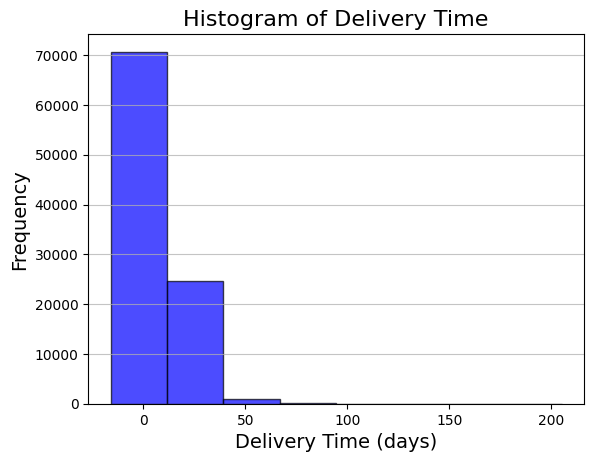

In [43]:
# Membuat histogram
plt.hist(orders['delivery_time'],
         bins=8,  # Jumlah interval/bins
         alpha=0.7,  # Transparansi warna
         color='blue',  # Warna histogram
         edgecolor='black')  # Warna tepi bin

# Menambahkan label dan judul
plt.title('Histogram of Delivery Time', fontsize=16)
plt.xlabel('Delivery Time (days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Menampilkan grid
plt.grid(axis='y', alpha=0.75)

# Menampilkan histogram
plt.show()

In [44]:
total_delivery_above_50 = orders[orders['delivery_time'] > 50]['delivery_time'].sum()
print("Total delivery_count yang lebih besar dari 50:", int(total_delivery_above_50))

Total delivery_count yang lebih besar dari 50: 30808


### Explore Customers and Orders

In [45]:
# Memeriksa apakah setiap DataFrame memiliki kolom 'customer_id'
for name, df in data.items():
    if 'customer_id' in df.columns:
        print(f"{name} memiliki kolom 'customer_id'")
    else:
        print("")

orders memiliki kolom 'customer_id'




customers memiliki kolom 'customer_id'





In [46]:
orders.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,delivery_time
26647,6355eaa9ea0d6a5946978835f89effbb,387183c2d8b0450043d97f07d42fd8d0,delivered,2017-06-09 11:12:56,2017-06-10 02:43:36,2017-06-12 14:52:07,2017-06-19 21:13:36,2017-07-04 00:00:00,On Time,7.0
16329,3c7f51d2d4719b8f3b5af55c167b2fb4,3c2c0a8240bf76896722b75881b676d1,delivered,2018-05-18 15:43:20,2018-05-19 12:31:41,2018-05-22 09:33:00,2018-06-08 14:55:34,2018-06-22 00:00:00,On Time,17.0


In [47]:
customers.sample(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
48944,8ef0c4ed92f36f086327ceed339112fe,415ea804893f5617329ab4c9ff036e17,89490,tres barras,SC
71965,5f2d3a20b81937d3ef88d622b2f92035,4b0248ab9516b1c3c69cb1b9f5157014,71530,brasilia,DF


In [48]:
customers_df = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,On Time,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,On Time,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,Late,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,On Time,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,On Time,10.0


### Explore Reviews

In [49]:
reviews.sample(2)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
85433,e97ee3ce4184d0679e369fe1452976fc,663ea079977e933b9c2c27fe78b93629,4,0,2018-08-31 00:00:00,2018-09-04 11:40:01
20275,68513ed14b72ea332f524b7bd5b6d230,1a0a36c1032d171afbfdb82012107bf6,5,0,2017-09-29 00:00:00,2017-09-30 14:40:27


In [50]:
# Memeriksa apakah setiap DataFrame memiliki kolom 'order_id'
for name, df in data.items():
    if 'order_id' in df.columns:
        print(f"{name} memiliki kolom 'order_id'")
    else:
        print("")

orders memiliki kolom 'order_id'
items memiliki kolom 'order_id'

payments memiliki kolom 'order_id'
reviews memiliki kolom 'order_id'






In [51]:
customer_reviews =pd.merge(
    left=customers_df,
    right=reviews,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
customer_reviews.sample(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,delivery_time,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
98777,f9e3d57a81a5390d5c19d3d6796ab7f1,a5854c79718864cb7023094de2c0f8f8,22630,rio de janeiro,RJ,987f3d9ad096993454ef3c2c4d9f7a68,delivered,2017-06-18 23:14:38,2017-06-18 23:30:12,2017-06-30 09:51:26,2017-07-07 20:07:40,2017-07-11 00:00:00,On Time,7.0,dc5f9d1bb234554a1a66a3b64a4e99ec,3.0,1.0,2017-07-08 00:00:00,2017-07-12 01:31:33
89647,d2fdd1d3725bccaa0900e360a985398f,d130666a33d3681209c5c752fe56ee10,80620,curitiba,PR,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore Payments

In [52]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

### Explore Items

In [53]:
# Memeriksa apakah setiap DataFrame memiliki kolom 'seller_id'
for name, df in data.items():
    if 'seller_id' in df.columns:
        print(f"{name} memiliki kolom 'seller_id'")
    else:
        print("")


items memiliki kolom 'seller_id'




sellers memiliki kolom 'seller_id'




In [54]:
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
928,b452cb0ae35044c4a53179c39f49fb06,18047,sorocaba,SP
985,59b22a78efb79a4797979612b885db36,38414,uberlandia,MG
507,f45122a9ab94eb4f3f8953578bc0c560,13419,piracicaba,SP
589,93b9a99027bd8bd6af682aff18dd19bf,7600,mairipora,SP
2190,c8025364abeecb115431bf95c11a747f,90630,porto alegre,RS


In [55]:
items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
650,0180ebc47853bfc5997af28f5a7e8849,1,861857117917aaa99611defcc0d514cd,e9779976487b77c6d4ac45f75ec7afe9,2017-03-22 16:29:32,162.00,11.74
1128,029f7a5aabaadfcdfe8c0eddb59a1069,2,0a4093a4af429dc0a9334300e5c13ae5,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-09 16:29:19,29.90,8.27
55286,7db5f2eb8f5f54db9f9e71ba4296bcbf,1,2a2d22ae30e026f1893083c8405ca522,1a3df491d1c4f1589fc2b934ada68bf2,2017-06-07 11:10:16,134.90,29.34
98008,de52e5e01af9c33b04806dea37fb50d7,1,90d44d8f3025c0bcf8ef83de3fe8011e,903037660cf848a717166eb7a06d616e,2018-07-30 16:24:19,49.99,16.54
107695,f4b2e1f6d7efad219764d0da00936947,1,7c55ea4aea1acf1ce11440010f5aa298,955fee9216a65b617aa5c0531780ce60,2018-05-22 11:21:57,399.00,71.09


In [56]:
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [57]:
# mau liat dari seller_state total harga ongkirnya berapa
ongkir_price_counts = item_seller_df.groupby('seller_state')['price'].sum().reset_index(name='Ongkir Price Total Count')
print (ongkir_price_counts)

   seller_state  Ongkir Price Total Count
0            AM                   1177.00
1            BA                 277925.51
2            CE                  19517.84
3            DF                  94840.31
4            ES                  46941.64
5            GO                  64806.59
6            MA                  36097.98
7            MG                 977588.31
8            MS                   8551.69
9            MT                  17007.82
10           PA                   1238.00
11           PB                  16395.50
12           PE                  91164.15
13           PI                   2383.00
14           PR                1232096.99
15           RJ                 820611.59
16           RN                   9992.60
17           RO                   4762.20
18           RS                 373412.08
19           SC                 613591.65
20           SE                   1606.20
21           SP                8508540.28


### Explore sellers

In [58]:
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1171,dbd66278cbfe1aa1000f90a217ca4695,5588,sao paulo,SP
2859,5b33b527da3c5b969cc99dc435cad09a,87702,paranavai,PR
841,94165aea8a35c3c21499cbcae239b16c,38412,uberlandia,MG
2607,b586cd24c010a13916af621b0325fbba,89164,rio do sul,SC
1557,75fbb52eda0cbc24f479d3b2fbfa8d3e,74560,goiania,GO


In [59]:
#total penjualan di kota tempat asal si penjual
sellers.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

### Explore Products and Category

In [60]:
products.sample(5)

,product_id,product_category_name,product_photos_qty
16311,926d11f0e2a1171fed968faf5caa8f92,ferramentas_jardim,1.0
7950,f89594c3583443e5e0d464e97284835d,cool_stuff,2.0
4171,058453fe8a9473eceee27349de3b38ac,relogios_presentes,3.0
24944,cd494d8236315646d34e31b09c5f86a4,beleza_saude,3.0
4211,3a4dfe5f744b6f8727a27241cf1d97bc,alimentos,1.0


In [61]:
category.sample(5)

,product_category_name,product_category_name_english
58,bebidas,drinks
65,dvds_blu_ray,dvds_blu_ray
18,eletroportateis,small_appliances
56,eletrodomesticos_2,home_appliances_2
62,casa_conforto_2,home_comfort_2


In [62]:
# Memeriksa apakah setiap DataFrame memiliki kolom 'product_category_name'
for name, df in data.items():
    if 'product_category_name' in df.columns:
        print(f"{name} memiliki kolom 'product_category_name'")
    else:
        print("")



products memiliki kolom 'product_category_name'





category memiliki kolom 'product_category_name'


In [63]:
# gabungkan products and category. left join karna saya ingin product_category_name_english yang bergabung ke
# kolom data 'products'.
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [64]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [65]:
# Merge item_seller_df & product_df
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [66]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

### Explore Geo

In [67]:
data['geo'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
891461,86975,-23.520053,-51.654845,mandaguari,PR
775707,69040,-3.089014,-60.033327,manaus,AM
897486,87485,-23.381820,-53.301447,douradina,PR
208430,8588,-23.441837,-46.308709,itaquaquecetuba,SP
382914,18160,-23.647762,-47.572303,salto de pirapora,SP


In [68]:
data['geo'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
58403      1
1200       1
1189       1
1290       1
1262       1
Length: 19015, dtype: int64

In [69]:
data['geo'][data['geo']['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


### Explore Keseluruhan

In [70]:
customers_df.sample(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,delivery_time
73100,d19f71039cf48477275961be96df0a13,45cb645cd8d03a8704424516bf9d01d0,4019,sao paulo,SP,9c1065a9bf5514fd2349797c407c61b7,delivered,2018-03-16 10:30:59,2018-03-16 10:48:57,2018-03-19 13:05:39,2018-03-20 22:28:45,2018-03-28 00:00:00,On Time,1.0
68188,bf632bfc93eda6f702cb9607513e2b6d,6d918e72195a40d8547c89b04a079860,37470,sao lourenco,MG,394bd8c3711009590ecf308602f1dfeb,delivered,2017-07-12 15:34:23,2017-07-14 02:25:33,2017-07-14 20:03:01,2017-07-25 19:19:51,2017-08-03 00:00:00,On Time,11.0


In [71]:
customers_df = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,On Time,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,On Time,14.0


In [72]:
M1=pd.merge(
    left=customers_df,
    right=payments,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
M1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,On Time,2.0,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,On Time,14.0,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,Late,3.0,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,On Time,1.0,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,On Time,10.0,1.0,credit_card,8.0,252.25


In [73]:
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [74]:
M2=pd.merge(
    left=M1,
    right=items,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
M2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [75]:
M3=pd.merge(
    left=M2,
    right=sellers,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
M3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [76]:
all_data=pd.merge(
    left=M3,
    right=reviews,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118681,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,74.90,13.88,17400.0,garca,SP,36e2cdbaa9f639b57c53b37ac798fee8,4.0,0.0,2018-04-14 00:00:00,2018-04-28 11:15:04
118682,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,114.90,14.16,14802.0,araraquara,SP,b273b431c3aedb4eed18643309652940,5.0,0.0,2018-04-12 00:00:00,2018-04-16 10:36:05
118683,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,37.00,19.04,3304.0,sao paulo,SP,fa4f16891e6b2edd1354668d07f5648b,1.0,1.0,2018-05-04 00:00:00,2018-05-08 01:41:07
118684,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,689.00,22.07,14840.0,guariba,SP,0bcdc9e450ea500811a8d39ee993cd47,5.0,0.0,2017-11-17 00:00:00,2017-11-19 23:34:18


# RFM

In [77]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])
all_data['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [78]:
all_data['order_purchase_timestamp'].min()

Timestamp('2016-09-15 12:16:38')

In [79]:
all_data['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [80]:
now = pd.to_datetime('2018-10-30 00:00:00')

In [81]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_data.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_data.groupby('customer_id')['order_id'].count()
monetary = all_data.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [82]:
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list

In [83]:
# jumlah uang terbanyak yang dibabiskan oleh customer
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,395.0,8,13440.00
86603,de832e8dbb1f588a47013e53feaa67cc,518.0,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,257.0,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,172.0,7,9520.14
56788,926b6a6fb8b6081e00b335edaf578d35,559.0,2,7998.00
...,...,...,...,...
24465,3f0bb4c1fae52dfe92ff27372d2b0d67,NaN,0,0.00
24240,3e6754e591ff3568ccc5bf69a649918c,NaN,0,0.00
73256,bbdbc21c0d067bd705b5aaff781709c9,NaN,0,0.00
93,003cb2c7ce25d8af8556fb456f903546,NaN,0,0.00


In [84]:
#customer dengan jumlah pembelian belanja terbanyak
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,447.0,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,401.0,38,3039.62
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,509.0,26,1299.74
16961,2ba91e12e5e4c9f56b82b86d9031d329,338.0,24,2397.60
38590,63b964e79dee32a3587651701a2b8dbf,257.0,24,9888.00
...,...,...,...,...
96113,f742b8152818738cf8ed12cff171bad5,NaN,0,0.00
96175,f76cd756cb7b70b6f769c529728596ce,NaN,0,0.00
96174,f76bd438480c183ffb510bad040f3bd9,NaN,0,0.00
96163,f76262103d732ab3dc351f36b1cf976c,NaN,0,0.00


In [85]:
# Customer terakhir yang melakukan pembelian
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
52277,86dc2ffce2dfff336de2f386a786e574,774.0,3,134.97
72024,b8cf418e97ae795672d326288dfab7a7,756.0,1,119.90
49183,7ec40b22510fdbea1b08921dd39e63d8,756.0,1,21.90
89911,e6f959bf384d1d53b6d68826699bba12,756.0,1,128.90
46540,7812fcebfc5e8065d31e1bb5f0017dae,756.0,1,29.99
...,...,...,...,...
99317,ffaded93e5a1fce06363cfb6905676a1,NaN,0,0.00
99333,ffb81db92e7ac00ecfac978f673be8a6,NaN,0,0.00
99405,ffe7ffb7c7ae0d42808f387578426b3b,NaN,0,0.00
99434,fffc22669ca576ae3f654ea64c8f36be,NaN,0,0.00


# Visualisasi

### 1. Produk apa yang paling banyak dan sedikit yang terjual?

In [86]:
category.sample()

,product_category_name,product_category_name_english
64,cds_dvds_musicais,cds_dvds_musicals


In [87]:
products.sample()

,product_id,product_category_name,product_photos_qty
30449,ce045b0fd0fb3300b45effc7fb45012d,relogios_presentes,4.0


In [88]:
category_products = pd.merge(
    left=products,
    right=category,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [89]:
product_id_counts = category_products.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df

,product_category_name_english,product_id
7,bed_bath_table,3029
65,sports_leisure,2867
39,furniture_decor,2657
43,health_beauty,2444
49,housewares,2335
...,...,...
67,tablets_printing_image,9
46,home_comfort_2,5
29,fashion_childrens_clothes,5
61,security_and_services,2


C:\Users\Anonymus\AppData\Local\Temp\ipykernel_18732\1127009799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
C:\Users\Anonymus\AppData\Local\Temp\ipykernel_18732\1127009799.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])


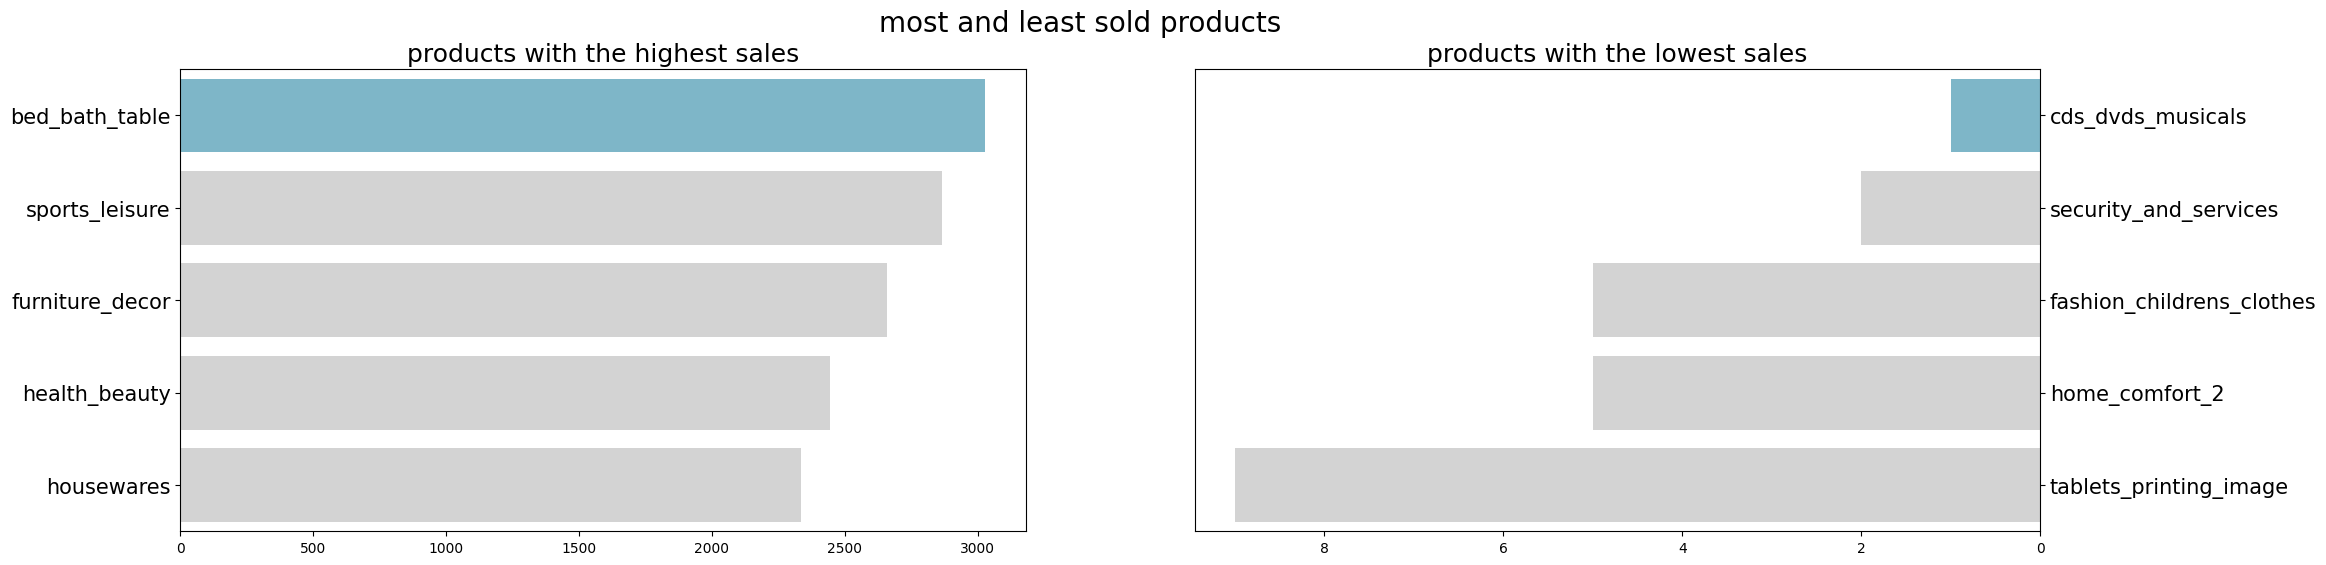

In [90]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("products with the highest sales", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("products with the lowest sales", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("most and least sold products", fontsize=20)
plt.show()

In [91]:
all_data.sample(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
25869,ab98d2da5363a55f4c3fac106aa2ab8f,f38532d296d5be924fdb891e14e34c75,78058,cuiaba,MT,NaN,NaN,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10622,df4058431c8103750dddc04b0b6583f2,26f17bce4c85dfa04d493059fe609cd5,22261,rio de janeiro,RJ,df71ba0f02310921da0a5e4f708916a5,delivered,2018-07-28 21:37:46,2018-07-28 21:50:15,2018-07-30 12:46:00,...,56.0,20.56,14940.0,ibitinga,SP,32119be8f4888547172ab9519e3a96a1,5.0,1.0,2018-08-04 00:00:00,2018-08-07 13:00:29


### Wilayah yang paling sering melakukan transaksi

In [92]:
other_state_geolocation = data['geo'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [93]:
geolocation_silver = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [94]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')


In [95]:
customers_silver.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,delivery_time,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,On Time,2.0,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,On Time,14.0,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,On Time,14.0,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,Late,3.0,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,Late,3.0,1151,são paulo,SP,-23.531294,-46.656866


In [96]:
customers_silver = customers_silver.drop_duplicates('order_id')

In [97]:
def plot_brazil_map(data):
    # Load the Brazil map image
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')

    # Create a scatter plot on the map
    ax = data.plot(kind="scatter",
                   x="geolocation_lng",
                   y="geolocation_lat",
                   figsize=(10, 10),
                   alpha=0.3,
                   s=0.3,
                   c='blue')  # Change the color to blue

    plt.axis('off')  # Turn off the axis
    plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4])  # Display the Brazil map
    plt.show()  # Show the plot

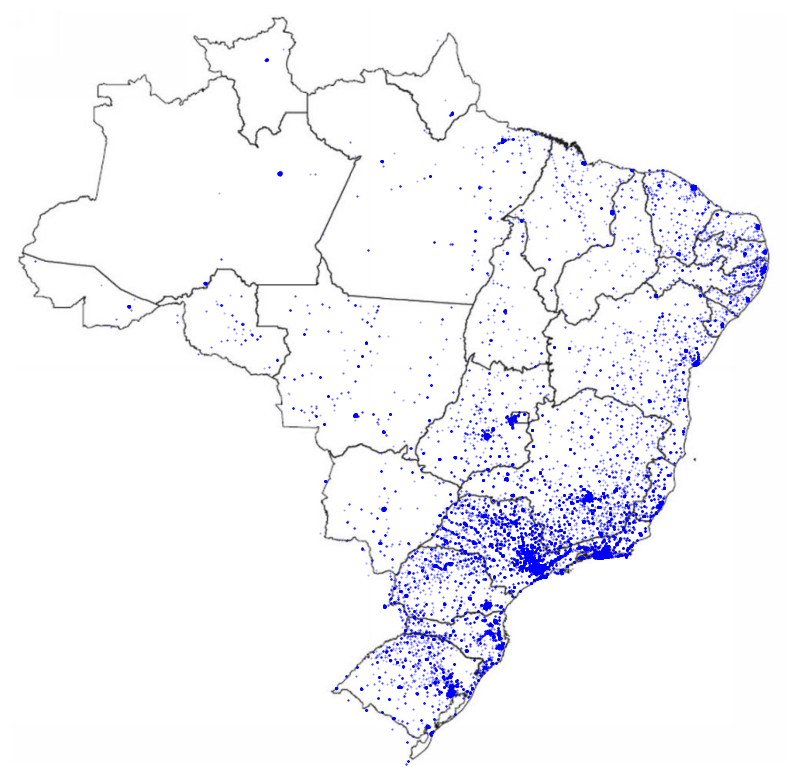

In [98]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

### Bagaimana tingkatan review yang diberikan oleh pelanggan?

C:\Users\Anonymus\AppData\Local\Temp\ipykernel_18732\3657188930.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_service.index,


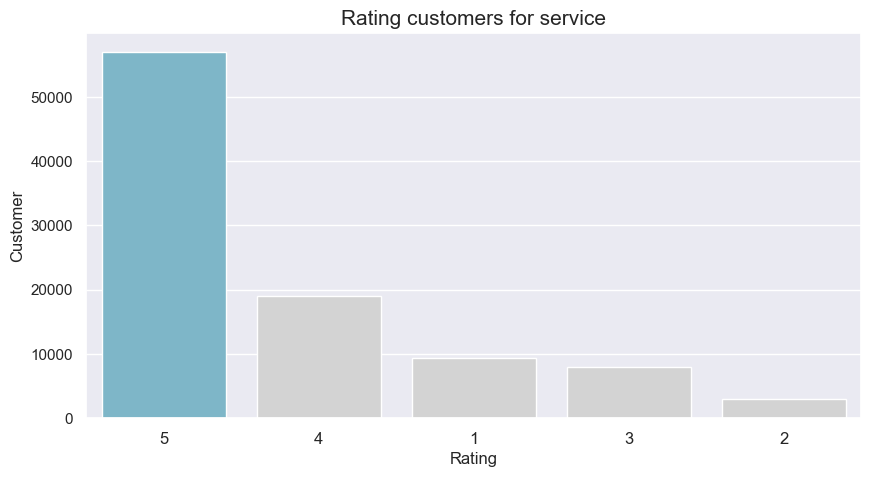

In [99]:
rating_service = reviews['review_score'].value_counts().sort_values(ascending=False)

max_score = rating_service.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_service.index,
            y=rating_service.values,
            order=rating_service.index,
            palette=["#72BCD4" if score == max_score else "#D3D3D3" for score in rating_service.index]
            )

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()

# Kesimpulan

1. Berdasarkan rangkaian step visualisasi yang telah dilakukan sebelumnya, **bed_bath_table** adalah barang yang **paling banyak terjual**. Sedangkan barang yang paling sedikit terjual adalah produk security_and_services


2. Dilihat dari map visualization sebelumnya, kebanyakan transaksi dilakukan di negara bagian tenggara, dan selatan.


3. Sebagian pelanggan menunjukkan tingkat kepuasan yang memuaskan, yang dapat dibuktikan melalui data histogram di atas. Sebagian besar pelanggan memberikan rating sempurna, yaitu nilai 5, dengan rata-rata yang dibulatkan berada di angka 4.


4. Dari analisis RFM yang telah dilakukan sebelumnya, dapat diketahui bahwa Jumlah pembelian tersebar dalam sekali transasksi sebesar 21 produk.Customer terakhir yang melakukan pembelian terakhir 774 hari yang lalu (dengan asumsi waktu sekarang 2018-10-30).Jumlah uang terbanyak yang dibabiskan oleh customer  terbesar 13440.00